### Parse data from Behave json file and display as pandas dataframe

- imports step data from Behave json file
- calculates step durations in seconds
- displays bar chart with pass/fail counts

In [1]:
import json
import pandas as pd
from pprint import pprint

In [2]:
# Read data from json file
filename = "/home/alan/temp/behave/json-reports/d2c4a812-c8fd-4d35-8466-06ae4e141804-result.json"
with open(filename) as jsonfile:
    data = json.load(jsonfile)

In [3]:
# Extract just the data concerning the steps
step_data = [step for step in data["steps"]]

In [4]:
# Create pandas df from the extracted step data (auto converts start and stop data to integer values)
df = pd.DataFrame.from_dict(step_data, orient='columns')
# re-arrange column order
df = df[["name", "start", "stop", "status"]]

In [5]:
# Work out duration of each step and add to df as new column
df["duration (s)"] = 0.001*(df['stop'] - df['start'])

##for c in df.columns:
##    print df[c].dtype

In [6]:
# Print heading from json data
print data["name"]

# Add colour highlighting for pass/fail and display the steps data
def highlighter(val):
    colour = "red"
    if val == "passed":
        colour = "green"
    return 'background-color: %s' % colour

df.style.applymap(highlighter, subset=['status'])

Fee Calculation without VAT


### Pass/Fail Counts

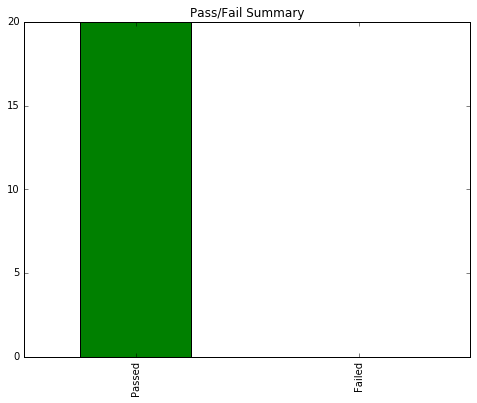

In [7]:
import matplotlib.pyplot as plt

# Count passes and fails
temp = list(df['status'])
counts = pd.Series([temp.count("passed"), temp.count("failed")], index=['Passed','Failed'])

# Plot results
# _ to capture unwanted return values -not essential but way of suppressing unwanted info being printed
_ = counts.plot.bar(figsize=(8, 6), color=["g", "r"])
_ = plt.title("Pass/Fail Summary")


### Original json data in 'pretty' layout

In [8]:
pprint(data)

{u'historyId': u'33977dbeaece5c6a5750335b9cfba958',
 u'labels': [{u'name': u'severity', u'value': u'normal'},
             {u'name': u'feature', u'value': u'CCR_VAT Calculations'},
             {u'name': u'framework', u'value': u'behave'},
             {u'name': u'language', u'value': u'cpython2'}],
 u'name': u'Fee Calculation without VAT',
 u'parameters': [{u'name': u'CaseDetails', u'value': u'Case Details 1'},
                 {u'name': u'TrialDetails', u'value': u'Trial Details 1'},
                 {u'name': u'DefendantDetails',
                  u'value': u'Defendant Details 1'},
                 {u'name': u'BasicFeeDetails', u'value': u'Basic 1.1'},
                 {u'name': u'ExpectedResults', u'value': u'VAT 1'}],
 u'start': 1518526287740,
 u'status': u'passed',
 u'steps': [{u'name': u'When I Login as "James Conlon" (CCRAdministrator,CCRDirector)',
             u'start': 1518526291108,
             u'status': u'passed',
             u'stop': 1518526291369},
            {u'name